## Câu hỏi: Mùa mưa/nắng kéo dài từ tháng nào đến tháng nào ?
**Lợi ích:** Chủ động hơn trong sắp xếp công việc và di chuyển.

### 1. Khai báo thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ file CSV
file_path = "ProcessedData.csv"
data = pd.read_csv(file_path)

# Xem thông tin cơ bản về dữ liệu
data.info()

# Hiển thị vài dòng đầu để kiểm tra dữ liệu
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7944 non-null   int64  
 1   timestamp              7944 non-null   int64  
 2   Temprature (Kelvin)    7944 non-null   float64
 3   Feels like (Kelvin)    7944 non-null   float64
 4   Pressure (mb)          7944 non-null   float64
 5   Humidity (%)           7944 non-null   float64
 6   Temperature Amplitude  7944 non-null   float64
 7   Wind speed (m/s)       7944 non-null   float64
 8   Wind degree            7944 non-null   float64
 9   Wind gust (m/s)        7944 non-null   float64
 10  Clouds all (%)         7944 non-null   float64
 11  Rain 1h (mm)           7944 non-null   float64
 12  Weather Description    7944 non-null   object 
 13  aqi                    7944 non-null   float64
 14  co                     7944 non-null   float64
 15  no  

,Unnamed: 0,timestamp,Temprature (Kelvin),Feels like (Kelvin),Pressure (mb),Humidity (%),Temperature Amplitude,Wind speed (m/s),Wind degree,Wind gust (m/s),...,Weather Description,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,1701388800,301.16,306.75,1011.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,921.25,128.75,42.50,0.0,56.74,246.02,294.09,29.64
1,1,1701392400,301.16,306.75,1011.0,89.0,0.0,0.51,300.0,0.0,...,scattered clouds,5.0,4699.71,109.08,34.62,0.0,42.44,199.75,233.37,22.29
2,2,1701396000,301.16,306.75,1010.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,3791.81,84.94,26.73,0.0,29.80,157.48,177.82,17.23
3,3,1701399600,300.16,304.35,1009.0,94.0,0.0,0.51,330.0,0.0,...,scattered clouds,5.0,3017.43,61.69,20.91,0.0,22.41,121.27,132.87,13.05
4,4,1701403200,299.16,299.16,1009.0,94.0,0.0,0.51,290.0,0.0,...,mist,5.0,2456.67,46.04,17.82,0.0,19.55,96.76,104.39,10.26


### 3. Chuyển đổi cột thời gian

In [3]:
# Chuyển đổi timestamp thành datetime và thêm cột tháng
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
data['month'] = data['datetime'].dt.month

# Hiển thị dữ liệu sau khi thêm cột datetime và month
data[['timestamp', 'datetime', 'month']].head()

,timestamp,datetime,month
0,1701388800,2023-12-01 00:00:00,12
1,1701392400,2023-12-01 01:00:00,12
2,1701396000,2023-12-01 02:00:00,12
3,1701399600,2023-12-01 03:00:00,12
4,1701403200,2023-12-01 04:00:00,12


### 4. Phân loại nhãn thời tiết

In [4]:
# Xác định nhãn thời tiết liên quan đến mưa và nắng
rain_labels = ['rain', 'thunderstorm', 'drizzle', 'shower']
sunny_labels = ['clear sky', 'few clouds', 'scattered clouds', 'broken clouds']

# Phân loại thời tiết thành "Rain", "Sunny", hoặc "Other"
data['weather_category'] = data['Weather Description'].apply(
    lambda x: 'Rain' if any(rain in x for rain in rain_labels) else
            ('Sunny' if any(sunny in x for sunny in sunny_labels) else 'Other')
)

# Kiểm tra kết quả
data[['Weather Description', 'weather_category']].head()

,Weather Description,weather_category
0,scattered clouds,Sunny
1,scattered clouds,Sunny
2,scattered clouds,Sunny
3,scattered clouds,Sunny
4,mist,Other


### 5. Đếm số lượng thời tiết theo tháng

In [5]:
# Đếm số lượng mỗi loại thời tiết theo tháng
weather_by_month = data.groupby(['month', 'weather_category']).size().unstack(fill_value=0)

# Hiển thị kết quả
weather_by_month

weather_category,Other,Rain,Sunny
month,,,
1,37,4,679
2,2,2,692
3,3,0,741
4,0,0,696
5,11,124,609
6,36,116,544
7,47,159,514
8,20,193,531
9,50,227,419


### 6. Trực quan hóa dữ liệu

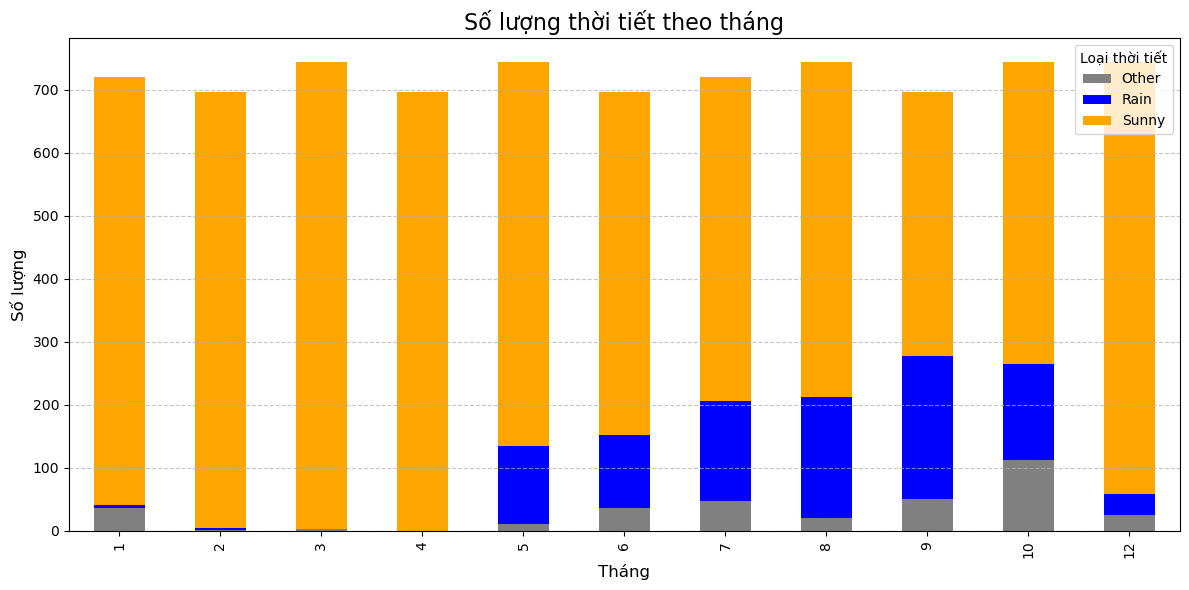

In [6]:
# Vẽ biểu đồ số lượng thời tiết theo tháng
weather_by_month.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gray', 'blue', 'orange'])

# Thêm tiêu đề và nhãn
plt.title("Số lượng thời tiết theo tháng", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.legend(title="Loại thời tiết")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 7. Xác định mùa mưa/nắng  
#### Phân tích dữ liệu 
- Mùa nắng:
    + Các tháng có số lượng thời tiết "Sunny" cao nhất là: tháng 1, 2, 3, 4, và 12.
    + Đỉnh điểm: Tháng 3 có số lượng ngày nắng cao nhất (741).
- Mùa mưa:
    + Các tháng có số lượng thời tiết "Rain" cao nhất là: tháng 5, 6, 7, 8, 9, và 10.
    + Đỉnh điểm: Tháng 9 có số lượng ngày mưa cao nhất (227).
- Thời gian chuyển giao:
    + Các tháng 5 và 12 có sự kết hợp giữa mưa và nắng, đóng vai trò chuyển mùa.  
    
#### Kết luận
- Mùa nắng: Từ tháng 1 đến tháng 4, kéo dài thêm tháng 12.
- Mùa mưa: Từ tháng 5 đến tháng 10, với đỉnh cao vào tháng 9.